In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

In [3]:
generate_data()

(array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
        0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
        0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
        0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
        0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
        0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
        0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
        0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
        0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
        0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
        0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
        0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
        0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
        0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
        0.07007007, 0.07107107, 0.07207207, 0.07

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

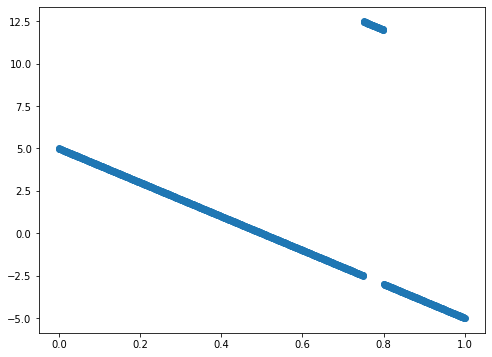

In [4]:
x = generate_data()[0]
y = generate_data()[1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.show()

- We can see that this line is not a continuous line. When x>0.75 and x<0.8, the line breaks.

# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = w*x + b`, where `y` is the output, `x` is the input, `w` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

In [5]:
# initialize weights
w = 1
b = 1

# set hyperparameters
lr = 0.001
times = 500

loss_list = []

# gradient descent
for i in range(times):
    # squared-error loss
    loss = ((w * x + b - y)**2).sum() / 2
    loss_list.append(loss)
    print('{:4}:   w = {:.8f}, b = {:.8f}, loss = {:.8f}'.format(i+1, w, b, loss))

    # update the parameters
    d_w = (x * (w * x + b - y)).sum()
    d_b = (w * x + b - y).sum()
    w = w - lr * d_w
    b = b - lr * d_b


   1:   w = 1.00000000, b = 1.00000000, loss = 8405.73907241
   2:   w = -0.08704538, b = 0.25000000, loss = 7547.50661415
   3:   w = -0.43656094, b = 0.79352269, loss = 7203.02258700
   4:   w = -0.94127435, b = 0.96828047, loss = 6931.39270905
   5:   w = -1.36504465, b = 1.22063718, loss = 6696.44404662
   6:   w = -1.77366583, b = 1.43252232, loss = 6491.57721158
   7:   w = -2.15195435, b = 1.63683291, loss = 6312.82172460
   8:   w = -2.50623889, b = 1.82597718, loss = 6156.84103343
   9:   w = -2.83694160, b = 2.00311944, loss = 6020.73284688
  10:   w = -3.14592604, b = 2.16847080, loss = 5901.96529221
  11:   w = -3.43453979, b = 2.32296302, loss = 5798.32911257
  12:   w = -3.70414692, b = 2.46726989, loss = 5707.89652107
  13:   w = -3.95599346, b = 2.60207346, loss = 5628.98533739
  14:   w = -4.19125092, b = 2.72799673, loss = 5560.12769650
  15:   w = -4.41101162, b = 2.84562546, loss = 5500.04274419
  16:   w = -4.61629645, b = 2.95550581, loss = 5447.61281124
  17:   w

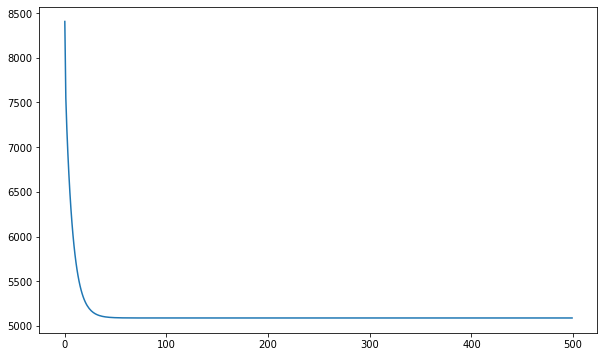

In [6]:
# plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.show()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


In [7]:
print(w)

-7.527472527472515


In [8]:
print(b)

4.513736263736257


In [ ]:
y_hat_l2 = w * x + b

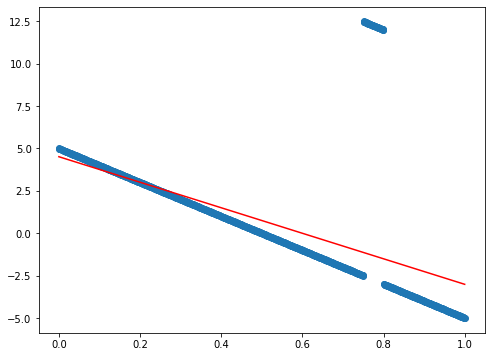

In [10]:
# plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, y_hat_l2, color = 'r')
plt.show()

- We can see that the trained parameters are not very close to the ground truth parameters. We can also see from the figure that there are some differences between the two lines. This is because the original data is not completely linear. When x>0.75 and x<0.8, the originally linear y value increases by 15.

# 4. "Robust" linear regression (0.5 points)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

In [12]:
# initialize weights
w = 1
b = 1

# set hyperparameters
lr = 0.00001
times = 10000

loss_list = []


# gradient descent
for i in range(times):
    # absolute difference
    loss = (abs(w * x + b - y)).sum()
    loss_list.append(loss)
    print('{:4}:   w = {:.8f}, b = {:.8f}, loss = {:.8f}'.format(i+1, w, b, loss))

    # update the parameters

    d_w = 0
    d_b = 0

    for j in range(len(x)):
        if (w*x[j] + b - y[j]) >= 0:
            d_w = d_w + x[j]
            d_b = d_b + 1
        else:
            d_w = d_w - x[j]
            d_b = d_b - 1
    
    w = w - lr * d_w
    b = b - lr * d_b


Streaming output truncated to the last 5000 lines.
5001:   w = -8.46624300, b = 4.24158000, loss = 1090.80291598
5002:   w = -8.46802987, b = 4.24246000, loss = 1090.40618666
5003:   w = -8.46981674, b = 4.24334000, loss = 1090.00945734
5004:   w = -8.47160360, b = 4.24422000, loss = 1089.61272802
5005:   w = -8.47339047, b = 4.24510000, loss = 1089.21599870
5006:   w = -8.47517734, b = 4.24598000, loss = 1088.81927655
5007:   w = -8.47695431, b = 4.24688000, loss = 1088.42254725
5008:   w = -8.47874118, b = 4.24776000, loss = 1088.02581793
5009:   w = -8.48052805, b = 4.24864000, loss = 1087.62908861
5010:   w = -8.48231491, b = 4.24952000, loss = 1087.23235929
5011:   w = -8.48410178, b = 4.25040000, loss = 1086.83562997
5012:   w = -8.48588865, b = 4.25128000, loss = 1086.43890119
5013:   w = -8.48766563, b = 4.25218000, loss = 1086.04217852
5014:   w = -8.48945249, b = 4.25306000, loss = 1085.64544920
5015:   w = -8.49123936, b = 4.25394000, loss = 1085.24871988
5016:   w = -8.4930

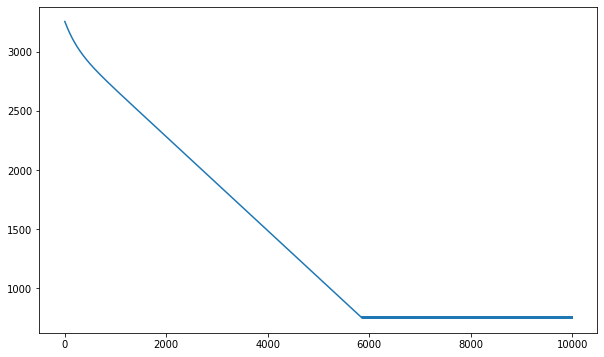

In [13]:
# plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.show()

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

In [14]:
print(w)

-10.00232540540638


In [15]:
print(b)

4.993319999999323


In [16]:
y_hat_l1 = w * x + b

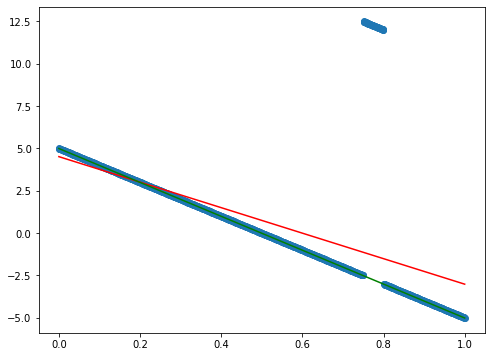

In [18]:
# plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, y_hat_l2, color = 'r')
plt.plot(x, y_hat_l1, color = 'g')
plt.show()

We can see that the model parameters trained with L1 Loss are closer to the true values. The L1 Loss is less affected by outliers and more robust.

This is because the L2 Loss squares the error. When the error is greater than 1, $(\hat{y} - y)^2 > |\hat{y} -y|$, the L2 Loss will further increase the error. 

Intuitively, it can be understood as follows: if we minimize L2 Loss to give only one predicted value for all sample points, then this value must be the average of all target values. But if it is to minimize L1 Loss, then this value will be the median of the target values of all sample points. It is well known that the median is more robust to outliers than the mean, so L2 Loss is also more stable to outliers than L1 Loss.